<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/DeepLearningRNN/blob/main/SeriesTemporaisLSTMpassageirosaviao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Séries Temporais com Rede Neural Recorrente**

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saulohenriaguiar","key":"f39a97212cfdbde2b816fdffcb292e24"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d rakannimer/air-passengers

  0% 0.00/764 [00:00<?, ?B/s]
100% 764/764 [00:00<00:00, 300kB/s]


In [ ]:
!unzip air-passengers.zip

Archive:  air-passengers.zip
  inflating: AirPassengers.csv       


In [ ]:
# Dataset: https://www.kaggle.com/rakannimer/air-passengers
import math
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'

In [ ]:
dataset = pandas.read_csv('/content/AirPassengers.csv')

In [ ]:
dataset.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


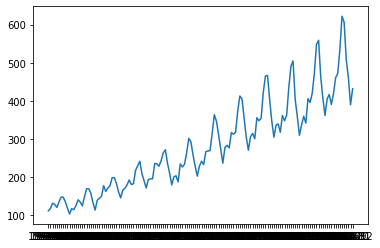

In [ ]:
plt.plot(dataset['Month'], dataset['#Passengers'])
plt.show()

In [ ]:
# Separando os dados entre treino e teste
# Vamos separar 33% para teste. Em vez de coletar amostras aleatoriamente com a função train_test_split, iremos coletar do início
#até 67% dos dados para treino e deixar o final para teste. 
tamanho_treino = int(len(dataset) * 0.67)
treino, teste = dataset[0:tamanho_treino], dataset[tamanho_treino:len(dataset)]
teste = teste.reset_index(drop=True) # Como depois iremos usar o comando .loc, precisaremos que os índices estejam iniciando em zero em ambos os dataframes

In [ ]:
def gera_dataset(dataset, tamanho_janela = 1):
    dataA, dataB = [], []
    for i in range(len(dataset)-tamanho_janela): # lembre-se que os datasets têm índices começando em zero
        a = dataset[i:(i+tamanho_janela)]['#Passengers'].values #armazena todos os dados localizados da linha i até i + tamanho_janela
        dataA.append(a)
        dataB.append(dataset.loc[[i+tamanho_janela]]['#Passengers'].values) #armazena apenas o dado localizado na linha i + tamanho_janela (esse não foi pego por dataA).
    return np.asarray(dataA, dtype=np.float32), np.asarray(dataB, dtype=np.float32)

In [ ]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela=1
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [ ]:
# Criando o modelo MLP com nº neurônios de entrada==tamanho_janela, 1 camada oculta de 8 neurônios e uma camada de saída:
modelo = Sequential()

# Camada de entrada + camada oculta
modelo.add(Dense(8, input_dim = tamanho_janela, activation = 'relu'))

# Camada de saída
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compilação
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
# Treinando o modelo:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2) 
# O objetivo é treinar a rede para prever o próximo valor sempre que determinado valor é informado. 
# Isso significa que uma entrada X tem como valor correto Y o próximo elemento.

Epoch 1/200
19/19 - 1s - loss: 42773.3945 - 541ms/epoch - 28ms/step
Epoch 2/200
19/19 - 0s - loss: 39628.1172 - 23ms/epoch - 1ms/step
Epoch 3/200
19/19 - 0s - loss: 36657.8320 - 25ms/epoch - 1ms/step
Epoch 4/200
19/19 - 0s - loss: 33674.9492 - 21ms/epoch - 1ms/step
Epoch 5/200
19/19 - 0s - loss: 30646.5918 - 20ms/epoch - 1ms/step
Epoch 6/200
19/19 - 0s - loss: 27754.0312 - 21ms/epoch - 1ms/step
Epoch 7/200
19/19 - 0s - loss: 24911.1445 - 20ms/epoch - 1ms/step
Epoch 8/200
19/19 - 0s - loss: 22123.2480 - 23ms/epoch - 1ms/step
Epoch 9/200
19/19 - 0s - loss: 19393.3320 - 28ms/epoch - 1ms/step
Epoch 10/200
19/19 - 0s - loss: 16818.4297 - 25ms/epoch - 1ms/step
Epoch 11/200
19/19 - 0s - loss: 14331.6553 - 29ms/epoch - 2ms/step
Epoch 12/200
19/19 - 0s - loss: 12066.6104 - 21ms/epoch - 1ms/step
Epoch 13/200
19/19 - 0s - loss: 9912.0967 - 28ms/epoch - 1ms/step
Epoch 14/200
19/19 - 0s - loss: 8036.1768 - 39ms/epoch - 2ms/step
Epoch 15/200
19/19 - 0s - loss: 6412.1313 - 25ms/epoch - 1ms/step
Epoch

In [ ]:
# Estimando a performance do modelo

score_treino = modelo.evaluate(x_treino, y_treino, verbose = 0)
print('Score em Treino: %.2f MSE (%.2f RMSE)' % (score_treino, math.sqrt(score_treino)))
score_teste = modelo.evaluate(x_teste, y_teste, verbose = 0)
print('Score em Teste: %.2f MSE (%.2f RMSE)' % (score_teste, math.sqrt(score_teste)))

Score em Treino: 541.44 MSE (23.27 RMSE)
Score em Teste: 2348.35 MSE (48.46 RMSE)


In [ ]:
# Tomando a raiz quadrada das estimativas de desempenho, podemos ver que o modelo tem um erro médio de 23 passageiros 
# (em milhares) no conjunto de dados de treinamento e 48 passageiros (em milhares) no conjunto de dados de teste.

In [ ]:
# Aumentando o tamanho da janela:
tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [ ]:
# Criando o modelo MLP com nº neurônios de entrada==tamanho_janela, 1 camada oculta de 8 neurônios e uma camada de saída:
modelo = Sequential()

# Camada de entrada + camada oculta
modelo.add(Dense(8, input_dim = tamanho_janela, activation = 'relu'))

# Camada de saída
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compilação
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
# Fit do modelo:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2) 

Epoch 1/200
18/18 - 0s - loss: 64756.8320 - 369ms/epoch - 21ms/step
Epoch 2/200
18/18 - 0s - loss: 59637.6562 - 20ms/epoch - 1ms/step
Epoch 3/200
18/18 - 0s - loss: 52457.3672 - 21ms/epoch - 1ms/step
Epoch 4/200
18/18 - 0s - loss: 43535.3125 - 21ms/epoch - 1ms/step
Epoch 5/200
18/18 - 0s - loss: 33440.2734 - 25ms/epoch - 1ms/step
Epoch 6/200
18/18 - 0s - loss: 23638.6895 - 26ms/epoch - 1ms/step
Epoch 7/200
18/18 - 0s - loss: 14703.2148 - 23ms/epoch - 1ms/step
Epoch 8/200
18/18 - 0s - loss: 8263.2480 - 23ms/epoch - 1ms/step
Epoch 9/200
18/18 - 0s - loss: 4217.5820 - 40ms/epoch - 2ms/step
Epoch 10/200
18/18 - 0s - loss: 2262.2322 - 25ms/epoch - 1ms/step
Epoch 11/200
18/18 - 0s - loss: 1510.3599 - 28ms/epoch - 2ms/step
Epoch 12/200
18/18 - 0s - loss: 1333.3589 - 32ms/epoch - 2ms/step
Epoch 13/200
18/18 - 0s - loss: 1295.5951 - 25ms/epoch - 1ms/step
Epoch 14/200
18/18 - 0s - loss: 1264.4197 - 27ms/epoch - 1ms/step
Epoch 15/200
18/18 - 0s - loss: 1260.4504 - 30ms/epoch - 2ms/step
Epoch 16/2

In [ ]:
# Estimando a performance do modelo
score_treino = modelo.evaluate(x_treino, y_treino, verbose = 0)
print('Score em Treino: %.2f MSE (%.2f RMSE)' % (score_treino, math.sqrt(score_treino)))
score_teste = modelo.evaluate(x_teste, y_teste, verbose = 0)
print('Score em Teste: %.2f MSE (%.2f RMSE)' % (score_teste, math.sqrt(score_teste)))

Score em Treino: 630.86 MSE (25.12 RMSE)
Score em Teste: 2589.95 MSE (50.89 RMSE)


In [ ]:
# Utilizando LSTM:
from keras.layers import LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset['#Passengers'] = scaler.fit_transform(dataset['#Passengers'].values.reshape(-1,1))
tamanho_treino = int(len(dataset) * 0.67)
treino, teste = dataset[0:tamanho_treino], dataset[tamanho_treino:len(dataset)]
teste = teste.reset_index(drop=True)

In [ ]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela=1
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [ ]:
# Reshape do input:
x_treino = np.reshape(x_treino, (x_treino.shape[0], 1, x_treino.shape[1])) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], 1, x_teste.shape[1]))

In [ ]:
# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape = (1, 1))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores: n_timesteps e n_features da variável X (entrada).

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2)

Epoch 1/200
19/19 - 2s - loss: 0.0565 - 2s/epoch - 87ms/step
Epoch 2/200
19/19 - 0s - loss: 0.0456 - 33ms/epoch - 2ms/step
Epoch 3/200
19/19 - 0s - loss: 0.0366 - 30ms/epoch - 2ms/step
Epoch 4/200
19/19 - 0s - loss: 0.0293 - 31ms/epoch - 2ms/step
Epoch 5/200
19/19 - 0s - loss: 0.0239 - 30ms/epoch - 2ms/step
Epoch 6/200
19/19 - 0s - loss: 0.0198 - 31ms/epoch - 2ms/step
Epoch 7/200
19/19 - 0s - loss: 0.0173 - 39ms/epoch - 2ms/step
Epoch 8/200
19/19 - 0s - loss: 0.0159 - 28ms/epoch - 1ms/step
Epoch 9/200
19/19 - 0s - loss: 0.0148 - 32ms/epoch - 2ms/step
Epoch 10/200
19/19 - 0s - loss: 0.0143 - 36ms/epoch - 2ms/step
Epoch 11/200
19/19 - 0s - loss: 0.0139 - 34ms/epoch - 2ms/step
Epoch 12/200
19/19 - 0s - loss: 0.0136 - 40ms/epoch - 2ms/step
Epoch 13/200
19/19 - 0s - loss: 0.0133 - 39ms/epoch - 2ms/step
Epoch 14/200
19/19 - 0s - loss: 0.0130 - 34ms/epoch - 2ms/step
Epoch 15/200
19/19 - 0s - loss: 0.0126 - 35ms/epoch - 2ms/step
Epoch 16/200
19/19 - 0s - loss: 0.0123 - 36ms/epoch - 2ms/step
Ep

In [ ]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))
print('Score em Teste: %.2f RMSE' % (score_treino))

Score em Treino: 23.01 RMSE
Score em Teste: 23.01 RMSE


In [ ]:
# Aplicando LSTM com window:

tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

# Reshape do input:
x_treino = np.reshape(x_treino, (x_treino.shape[0], 1, x_treino.shape[1])) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], 1, x_teste.shape[1]))

# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape = (1, x_treino.shape[2]))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores: n_timesteps e n_features da variável X (entrada).
# Obs: repare que no início do código, logo após aplicar a função create_dataset, x_treino e x_teste possuem duas dimensões,
# por isso que pegamos as features com x_treino.shape[1]. Depois fazemos um reshape, por isso que pegamos as features de x_treino
# no LSTM com x_treino.shape[2], pois essa infomação está na 3ª dimensão agora.

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
x_treino.shape

(86, 1, 10)

In [ ]:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2)

Epoch 1/200
18/18 - 2s - loss: 0.0220 - 2s/epoch - 112ms/step
Epoch 2/200
18/18 - 0s - loss: 0.0115 - 36ms/epoch - 2ms/step
Epoch 3/200
18/18 - 0s - loss: 0.0071 - 38ms/epoch - 2ms/step
Epoch 4/200
18/18 - 0s - loss: 0.0064 - 42ms/epoch - 2ms/step
Epoch 5/200
18/18 - 0s - loss: 0.0061 - 37ms/epoch - 2ms/step
Epoch 6/200
18/18 - 0s - loss: 0.0060 - 47ms/epoch - 3ms/step
Epoch 7/200
18/18 - 0s - loss: 0.0060 - 46ms/epoch - 3ms/step
Epoch 8/200
18/18 - 0s - loss: 0.0059 - 44ms/epoch - 2ms/step
Epoch 9/200
18/18 - 0s - loss: 0.0058 - 47ms/epoch - 3ms/step
Epoch 10/200
18/18 - 0s - loss: 0.0056 - 38ms/epoch - 2ms/step
Epoch 11/200
18/18 - 0s - loss: 0.0056 - 45ms/epoch - 3ms/step
Epoch 12/200
18/18 - 0s - loss: 0.0055 - 60ms/epoch - 3ms/step
Epoch 13/200
18/18 - 0s - loss: 0.0054 - 46ms/epoch - 3ms/step
Epoch 14/200
18/18 - 0s - loss: 0.0053 - 52ms/epoch - 3ms/step
Epoch 15/200
18/18 - 0s - loss: 0.0052 - 48ms/epoch - 3ms/step
Epoch 16/200
18/18 - 0s - loss: 0.0052 - 51ms/epoch - 3ms/step
E

In [ ]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))

Score em Treino: 19.51 RMSE
Score em Teste: 43.31 RMSE


In [ ]:
# Aplicando LSTM com timesteps:

tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

# Reshape do input:
x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1)) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape = (x_treino.shape[1], 1))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores: n_timesteps e n_features da variável X (entrada).
# Obs: repare que agora o n_timesteps e n_features mudaram de posição, portanto preciso pegar x_treino.shape[1] em vez de ..[2].

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2)

Epoch 1/200
18/18 - 2s - loss: 0.0238 - 2s/epoch - 103ms/step
Epoch 2/200
18/18 - 0s - loss: 0.0111 - 89ms/epoch - 5ms/step
Epoch 3/200
18/18 - 0s - loss: 0.0066 - 79ms/epoch - 4ms/step
Epoch 4/200
18/18 - 0s - loss: 0.0058 - 92ms/epoch - 5ms/step
Epoch 5/200
18/18 - 0s - loss: 0.0055 - 96ms/epoch - 5ms/step
Epoch 6/200
18/18 - 0s - loss: 0.0052 - 91ms/epoch - 5ms/step
Epoch 7/200
18/18 - 0s - loss: 0.0050 - 88ms/epoch - 5ms/step
Epoch 8/200
18/18 - 0s - loss: 0.0048 - 91ms/epoch - 5ms/step
Epoch 9/200
18/18 - 0s - loss: 0.0047 - 83ms/epoch - 5ms/step
Epoch 10/200
18/18 - 0s - loss: 0.0045 - 82ms/epoch - 5ms/step
Epoch 11/200
18/18 - 0s - loss: 0.0043 - 81ms/epoch - 5ms/step
Epoch 12/200
18/18 - 0s - loss: 0.0042 - 80ms/epoch - 4ms/step
Epoch 13/200
18/18 - 0s - loss: 0.0041 - 87ms/epoch - 5ms/step
Epoch 14/200
18/18 - 0s - loss: 0.0040 - 114ms/epoch - 6ms/step
Epoch 15/200
18/18 - 0s - loss: 0.0040 - 98ms/epoch - 5ms/step
Epoch 16/200
18/18 - 0s - loss: 0.0040 - 102ms/epoch - 6ms/step

In [ ]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))

Score em Treino: 23.61 RMSE
Score em Teste: 51.47 RMSE


In [ ]:
# Usando stateful:

tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

# Reshape do input:
x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1)) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

In [ ]:
x_treino.shape

(86, 10, 1)

In [ ]:
x_teste.shape

(38, 10, 1)

In [ ]:
# Empilhando LSTMs com stateful = True:

modelo = Sequential()
modelo.add(LSTM(4, batch_input_shape = (2, x_treino.shape[1], 1), stateful = True, return_sequences = True))  
modelo.add(LSTM(4, batch_input_shape = (2, x_treino.shape[1], 1), stateful = True))

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 2, shuffle = False, verbose = 2)

Epoch 1/200
43/43 - 3s - loss: 0.0055 - 3s/epoch - 72ms/step
Epoch 2/200
43/43 - 0s - loss: 0.0108 - 239ms/epoch - 6ms/step
Epoch 3/200
43/43 - 0s - loss: 0.0076 - 246ms/epoch - 6ms/step
Epoch 4/200
43/43 - 0s - loss: 0.0065 - 262ms/epoch - 6ms/step
Epoch 5/200
43/43 - 0s - loss: 0.0063 - 251ms/epoch - 6ms/step
Epoch 6/200
43/43 - 0s - loss: 0.0063 - 250ms/epoch - 6ms/step
Epoch 7/200
43/43 - 0s - loss: 0.0062 - 249ms/epoch - 6ms/step
Epoch 8/200
43/43 - 0s - loss: 0.0062 - 253ms/epoch - 6ms/step
Epoch 9/200
43/43 - 0s - loss: 0.0062 - 250ms/epoch - 6ms/step
Epoch 10/200
43/43 - 0s - loss: 0.0062 - 249ms/epoch - 6ms/step
Epoch 11/200
43/43 - 0s - loss: 0.0061 - 249ms/epoch - 6ms/step
Epoch 12/200
43/43 - 0s - loss: 0.0061 - 261ms/epoch - 6ms/step
Epoch 13/200
43/43 - 0s - loss: 0.0061 - 255ms/epoch - 6ms/step
Epoch 14/200
43/43 - 0s - loss: 0.0061 - 241ms/epoch - 6ms/step
Epoch 15/200
43/43 - 0s - loss: 0.0060 - 260ms/epoch - 6ms/step
Epoch 16/200
43/43 - 0s - loss: 0.0060 - 249ms/epoc

In [ ]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino, batch_size=2)
previsao_teste = modelo.predict(x_teste, batch_size=2)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))

Score em Treino: 28.26 RMSE
Score em Teste: 66.14 RMSE
